# Pruebas funciones ML Toolbox

### Imports

In [330]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, mannwhitneyu, shapiro, ttest_ind
from scipy import stats
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms

from Toolbox_ML import *

### Data

In [331]:
iris = pd.read_csv("./data/iris.csv")
boston = pd.read_csv("./data/obligatoria_hard.csv", sep = "|")
titanic = pd.read_csv("./data/titanic.csv")

## Función | describe_df

In [332]:
describe_df(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
Tipos,float64,float64,float64,float64,object
% Faltante,0.0,0.0,0.0,0.0,0.0
Valores Únicos,35,23,43,22,3
% Cardinalidad,23.33,15.33,28.67,14.67,2.0


In [333]:
describe_df(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Tipos,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,504,26,76,2,81,446,356,412,9,66,46,455,229
% Cardinalidad,99.6,5.14,15.02,0.4,16.01,88.14,70.36,81.42,1.78,13.04,9.09,89.92,45.26


In [334]:
describe_df(titanic)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
Tipos,object,float64,int64,int64,float64,object,object,bool,object,object,bool
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,2,89,7,7,248,3,3,2,3,2,2
% Cardinalidad,0.22,9.99,0.79,0.79,27.83,0.34,0.34,0.22,0.34,0.22,0.22


## Función | tipifica_variables

In [335]:
tipifica_variables(iris, umbral_categoria = 5, umbral_continua = 9)

,nombre_variable,tipo_sugerido
0,sepal_length,Numérica Continua
1,sepal_width,Numérica Continua
2,petal_length,Numérica Continua
3,petal_width,Numérica Continua
4,species,Categórica


In [336]:
tipifica_variables(boston, umbral_categoria = 5, umbral_continua = 9)

,nombre_variable,tipo_sugerido
0,CRIM,Numérica Continua
1,ZN,Numérica Discreta
2,INDUS,Numérica Continua
3,CHAS,Binaria
4,NOX,Numérica Continua
5,RM,Numérica Continua
6,AGE,Numérica Continua
7,DIS,Numérica Continua
8,RAD,Numérica Discreta
9,TAX,Numérica Continua


In [337]:
tipifica_variables(titanic, umbral_categoria = 5, umbral_continua = 9)

,nombre_variable,tipo_sugerido
0,sex,Binaria
1,age,Numérica Continua
2,sibsp,Numérica Discreta
3,parch,Numérica Discreta
4,fare,Numérica Continua
5,class,Categórica
6,who,Categórica
7,adult_male,Binaria
8,embark_town,Categórica
9,alive,Binaria


## Función | get_features_num_regression

- Iris

Umbral corr

In [338]:
get_features_num_regression(iris, "sepal_length", 0.1)

['sepal_width', 'petal_length', 'petal_width']

In [339]:
get_features_num_regression(iris, "petal_length", 0.5)

['sepal_length', 'petal_width']

In [340]:
get_features_num_regression(iris, "petal_length", 0.9)

['petal_width']

Con pvalue

In [341]:
get_features_num_regression(iris, "petal_length", 0.5, 0.001)

['sepal_length', 'petal_width']

Mensajes

In [342]:
get_features_num_regression(iris, "sepal_width", 0.7, 0.05)

No hay columna numérica que cumpla con las especificaciones de umbral de correlación y/o p-value.


In [343]:
get_features_num_regression(iris, "species", 0.5, 0.001)

Error: La columna species no es numérica.


In [344]:
get_features_num_regression(iris, "petal_length", 0.5, 1.2)

Error: El parametro pvalue 1.2  está fuera del rango [0,1].


- Boston

In [345]:
get_features_num_regression(boston, "MEDV", 0.1)

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [346]:
get_features_num_regression(boston, "MEDV", 0.5)

['RM', 'PTRATIO', 'LSTAT']

In [347]:
get_features_num_regression(boston, "RM", 0.3)

['ZN', 'INDUS', 'NOX', 'PTRATIO', 'LSTAT', 'MEDV']

P-value

In [348]:
get_features_num_regression(boston, "MEDV", 0.5, 0.001)

['RM', 'PTRATIO', 'LSTAT']

## Función | plot_features_num_regression

- Iris

Con lista de columnas

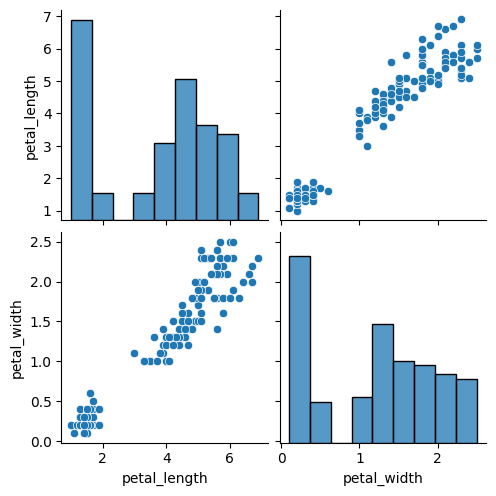

['petal_width']

In [349]:
plot_features_num_regression(iris, "petal_length", ["petal_width", "species"], umbral_corr = 0.4)

Sin lista de columnas

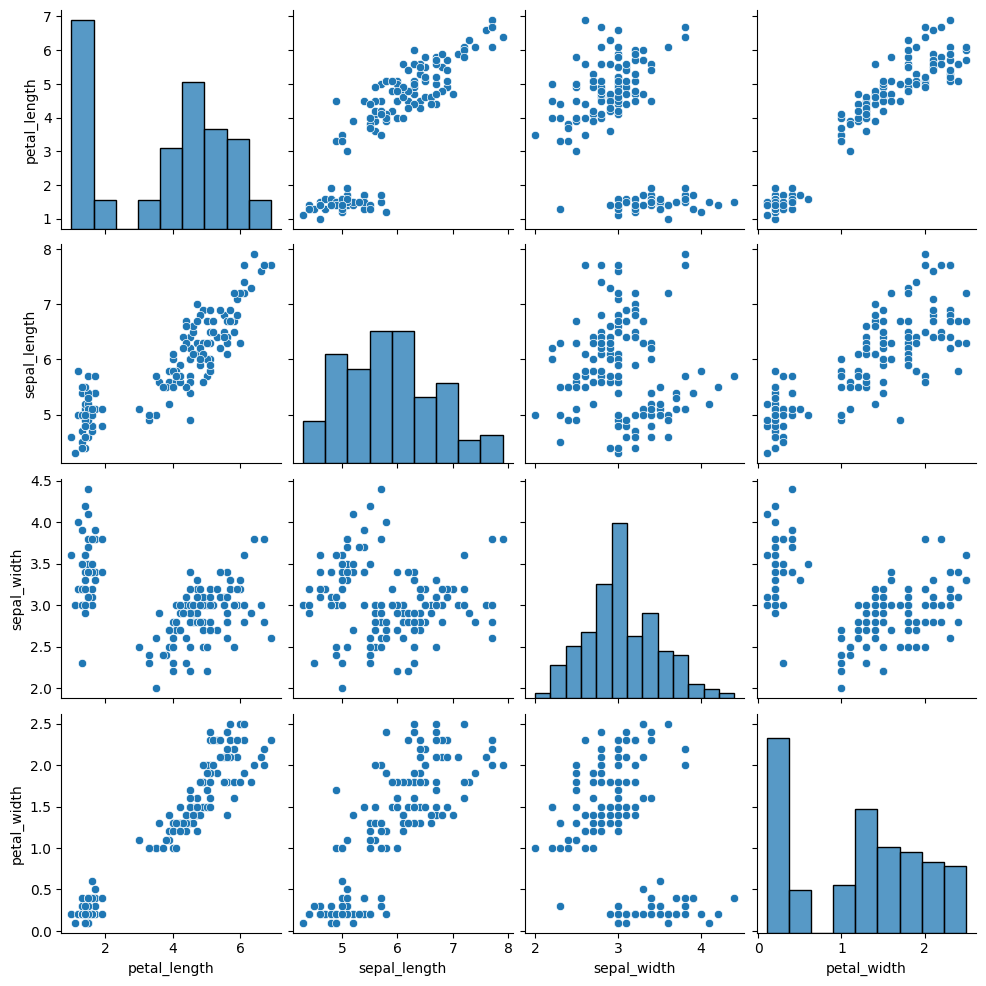

['sepal_length', 'sepal_width', 'petal_width']

In [350]:
plot_features_num_regression(iris, "petal_length", umbral_corr = 0.4)

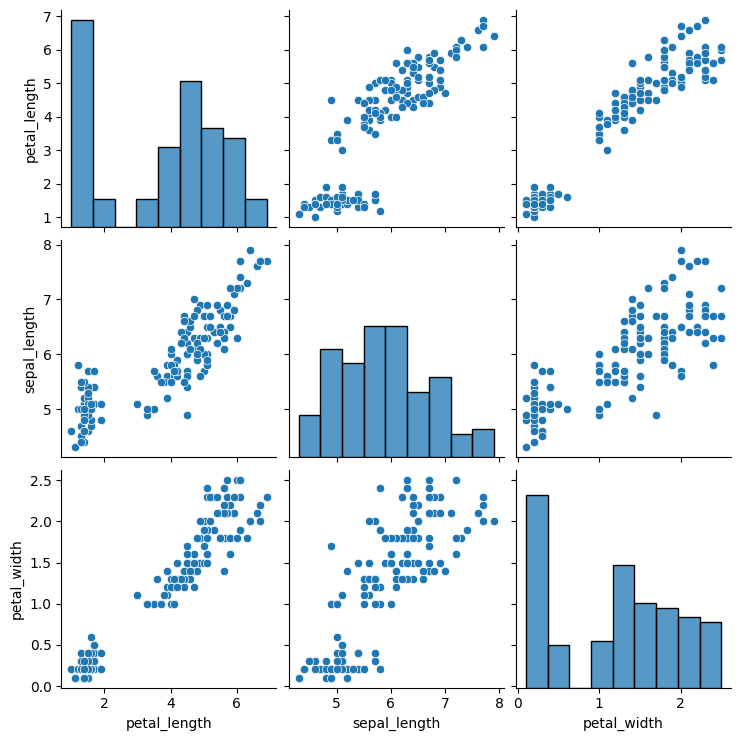

['sepal_length', 'petal_width']

In [351]:
plot_features_num_regression(iris, "petal_length", umbral_corr = 0.7)

- Boston

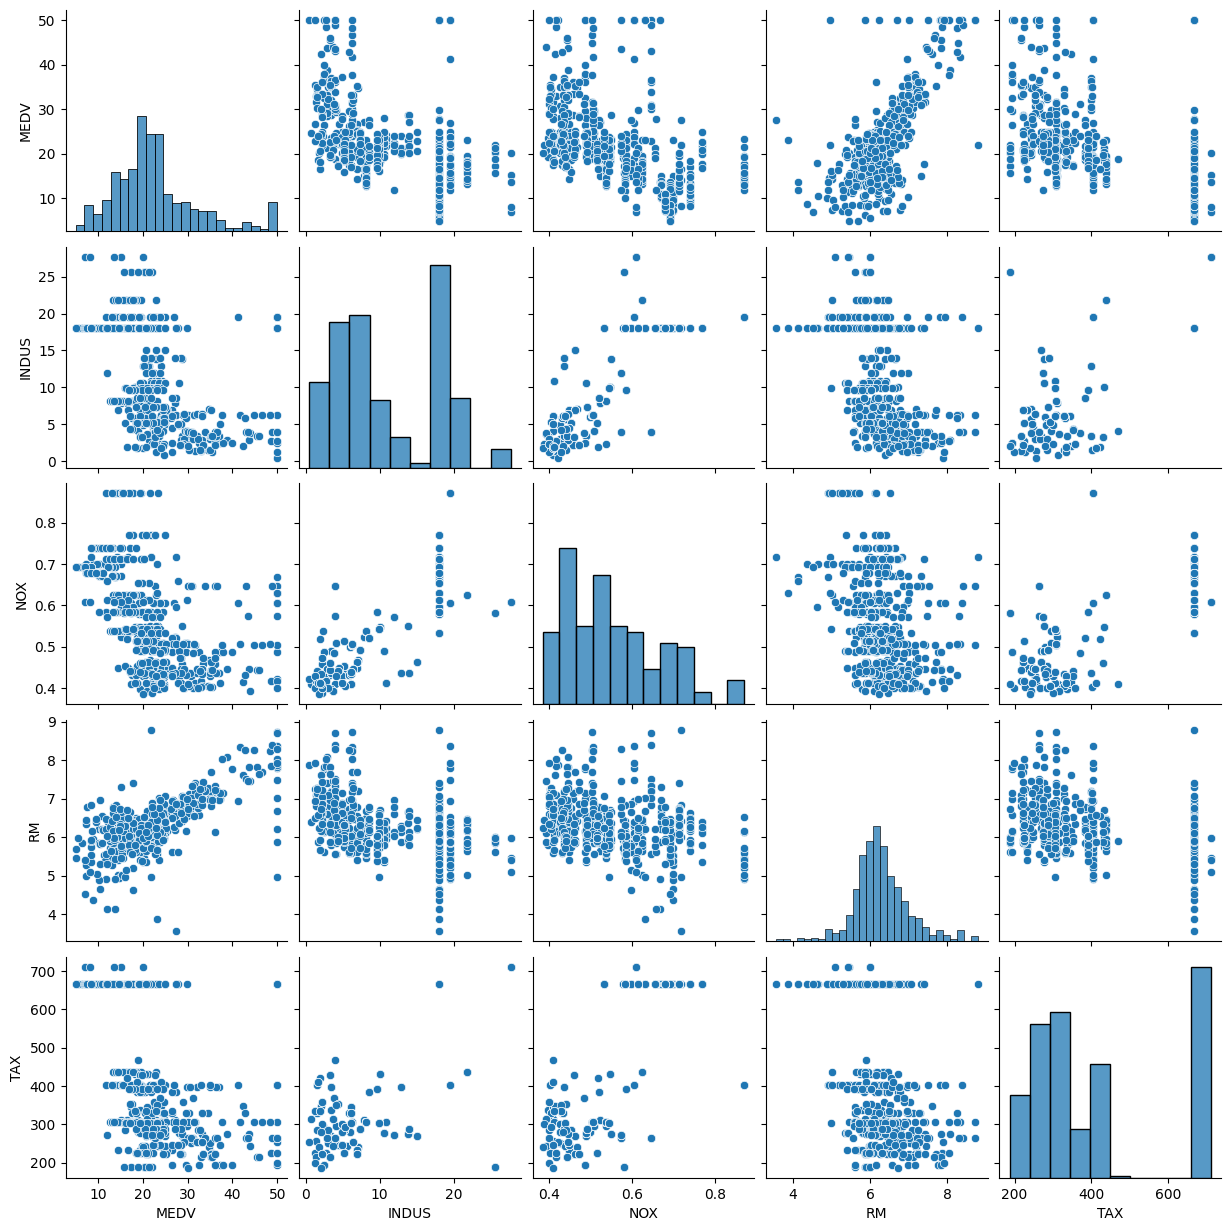

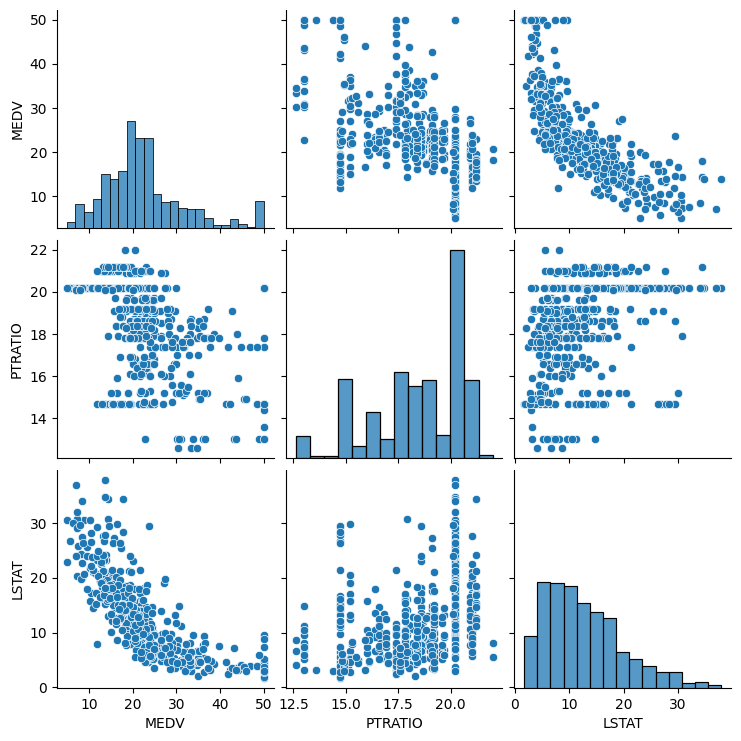

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [352]:
plot_features_num_regression(boston, "MEDV", umbral_corr = 0.4)

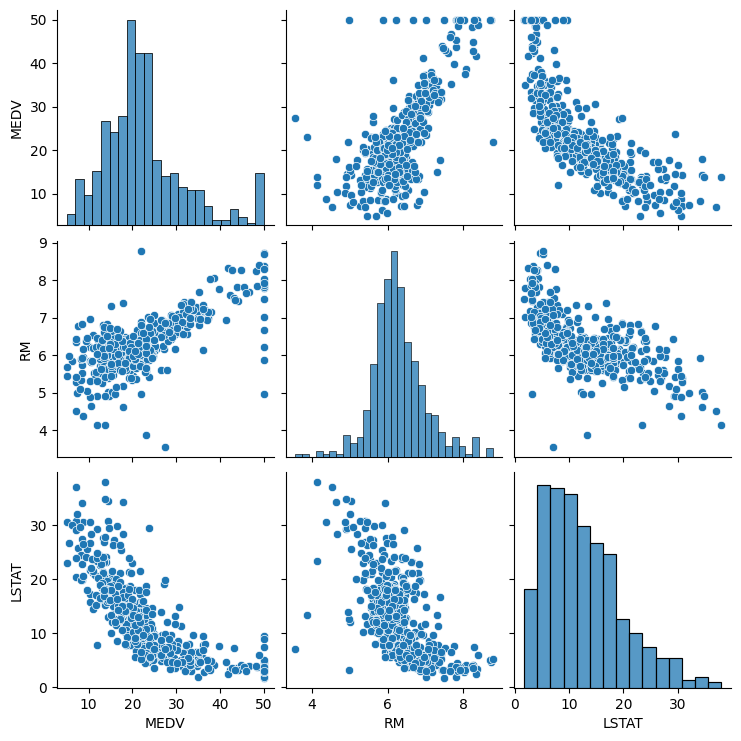

['RM', 'LSTAT']

In [353]:
plot_features_num_regression(boston, "MEDV", umbral_corr = 0.6)

Con p-value

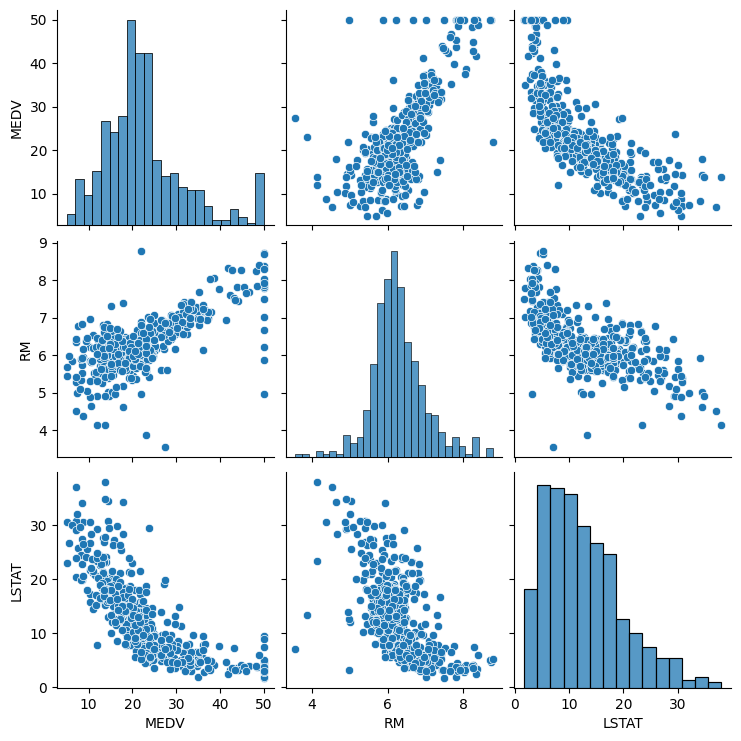

['RM', 'LSTAT']

In [354]:
plot_features_num_regression(boston, "MEDV", umbral_corr = 0.6, pvalue = 0.01)

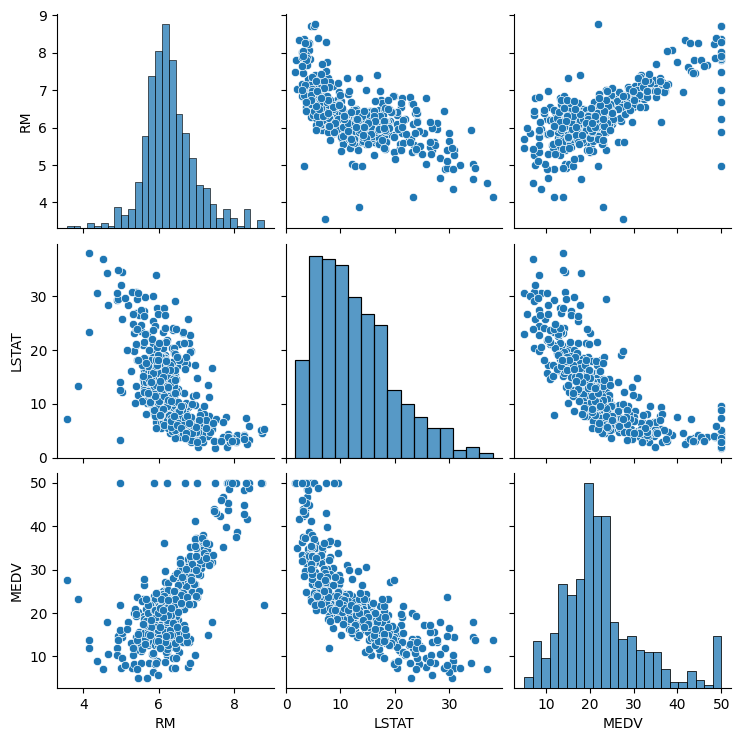

['LSTAT', 'MEDV']

In [355]:
plot_features_num_regression(boston, "RM", umbral_corr = 0.6, pvalue = 0.01)

### Función | get_features_cat_regression Versión "seguir el enunciado"

In [356]:
get_features_cat_regression(iris, "sepal_width")

['species']

In [357]:
get_features_cat_regression(iris, "species")

Error: El parámetro target  species  no es una columna numérica contínua del dataframe.


In [358]:
get_features_cat_regression(iris, "petal_width", pvalue= 1.5)

Error: El parametro pvalue 1.5  está fuera del rango [0,1].


In [359]:
get_features_cat_regression(iris, "MEDV")

Error: El parámetro target  MEDV  no es una columna del Dataframe.


- Titanic

In [360]:
get_features_cat_regression(titanic, "fare", 0.95)

['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [361]:
get_features_cat_regression(titanic, "fare")

['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [362]:
get_features_cat_regression(titanic, "age")

['sex', 'class', 'who', 'adult_male', 'alive', 'alone']

### Función | get_features_cat_regression Versión "Lo nuestro"

In [363]:
get_features_cat_regression(titanic, "fare")

['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [364]:
get_features_cat_regression(titanic, "fare", 1)

['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

In [365]:
get_features_cat_regression(titanic, "age", 0.5)

['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

### Función | plot_features_cat_regression

- Iris

Con lista de columnas

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


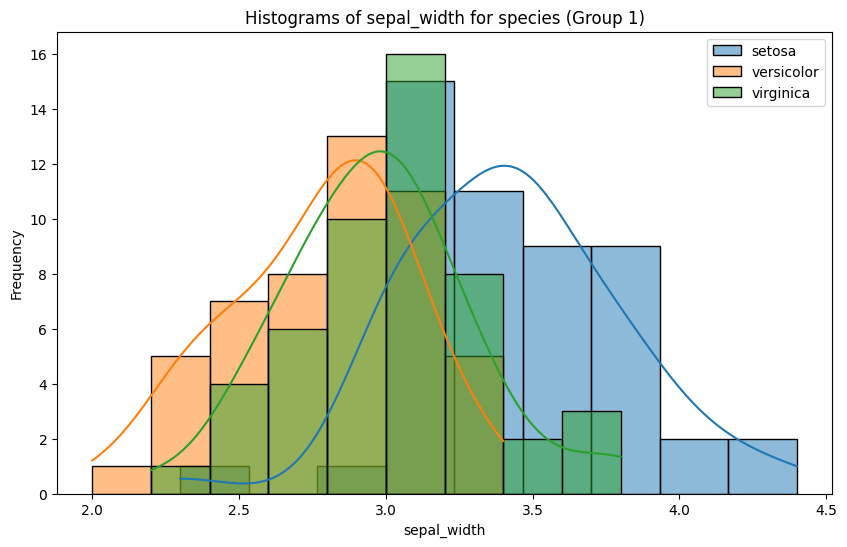

['species']

In [366]:
plot_features_cat_regression(iris, "sepal_width", ["petal_width", "species"], 0.05)

Sin lista de columnas

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


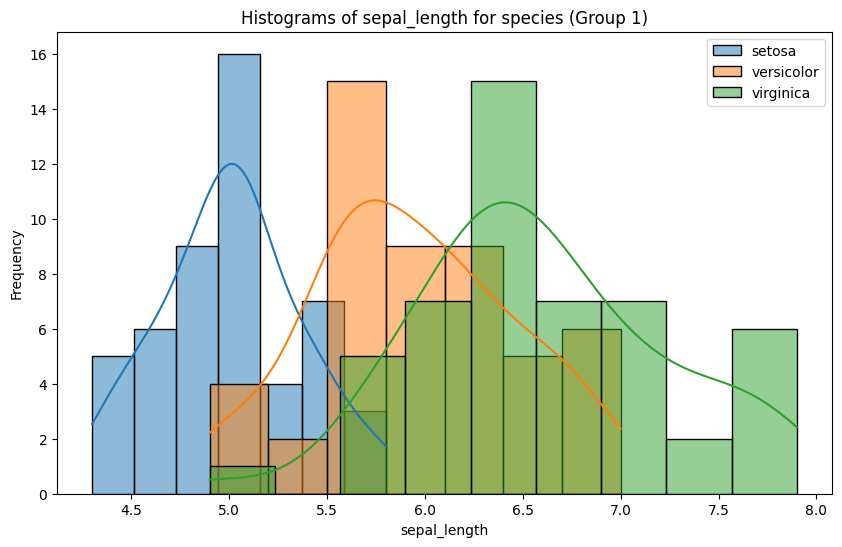

['species']

In [367]:
plot_features_cat_regression(iris, "sepal_length")

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


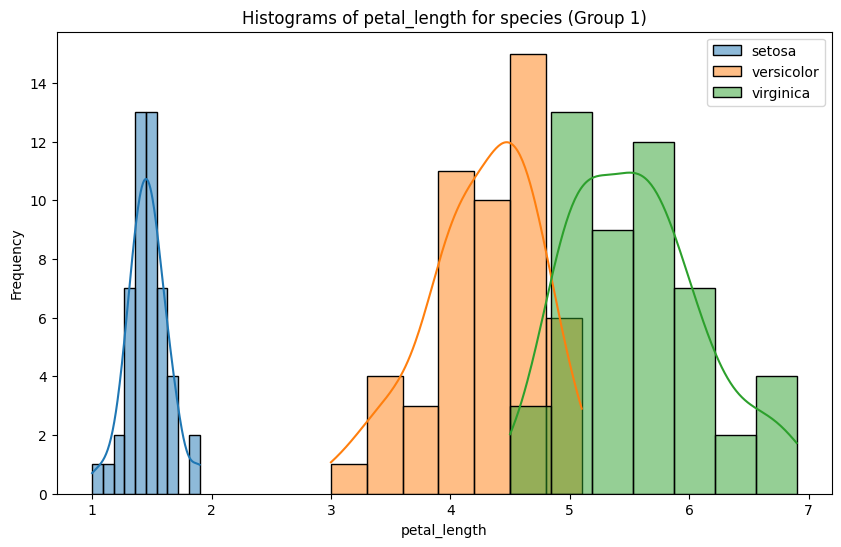

['species']

In [368]:
plot_features_cat_regression(iris, "petal_length", ["petal_width", "species"], 0.4)

Mensajes de error

In [369]:
plot_features_cat_regression(iris, "petal_length", ["petal_width", "species"], -0.05)

Error: El parámetro pvalue -0.05  está fuera del rango [0,1].


In [370]:
plot_features_cat_regression(iris, "species", ["petal_width", "sepal_width"], 0.8, with_individual_plot=True)

Error: El parametro target  species  no es una columna numérica continua del dataframe.


- Titanic

 Sin lista de columnas

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


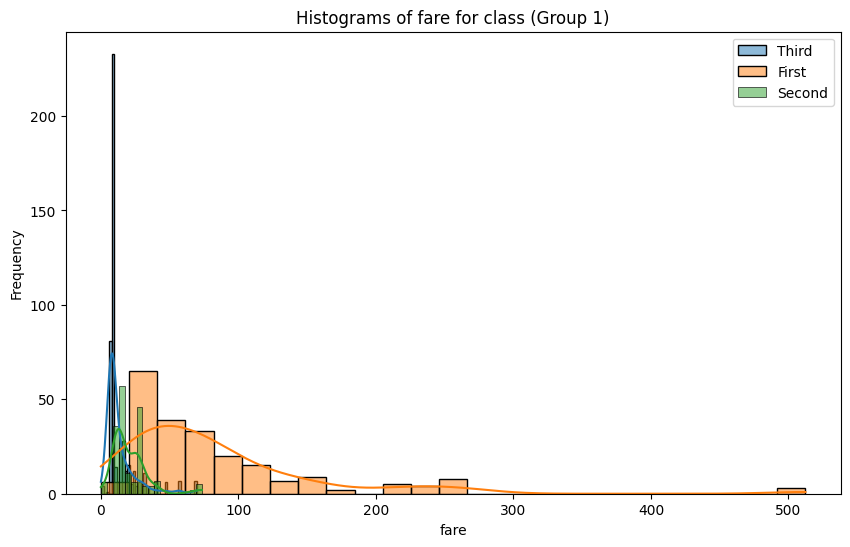

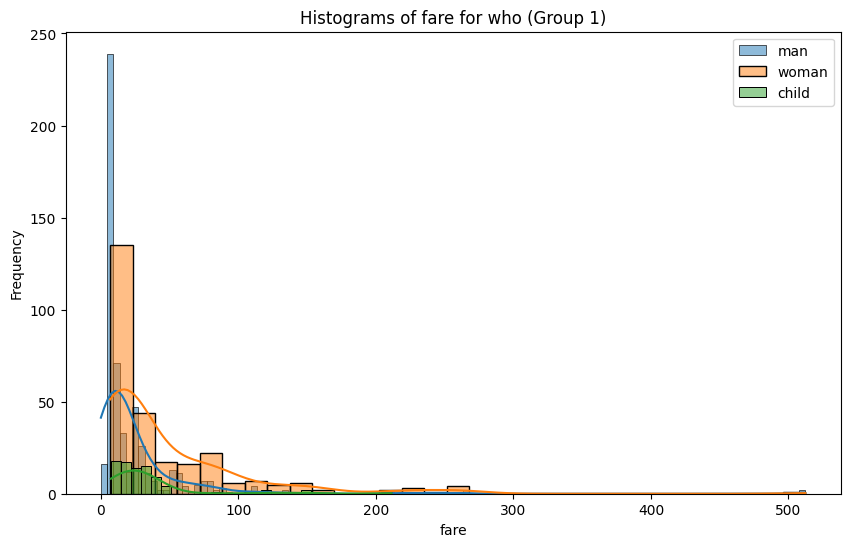

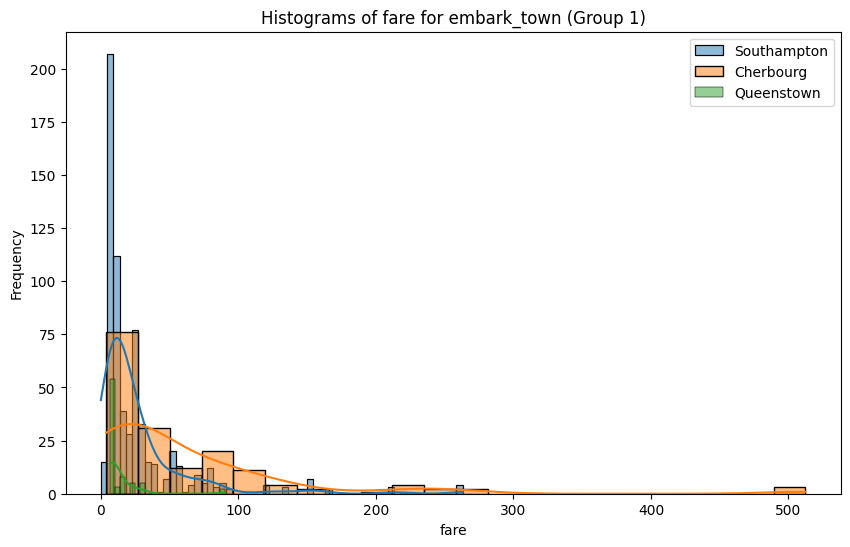

['class', 'who', 'embark_town']

In [372]:
plot_features_cat_regression(titanic, "fare", with_individual_plot=True)

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


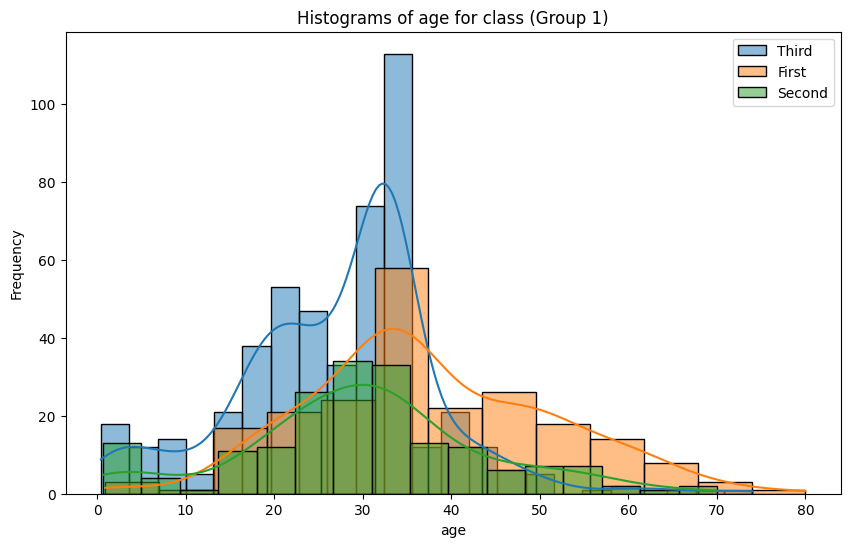

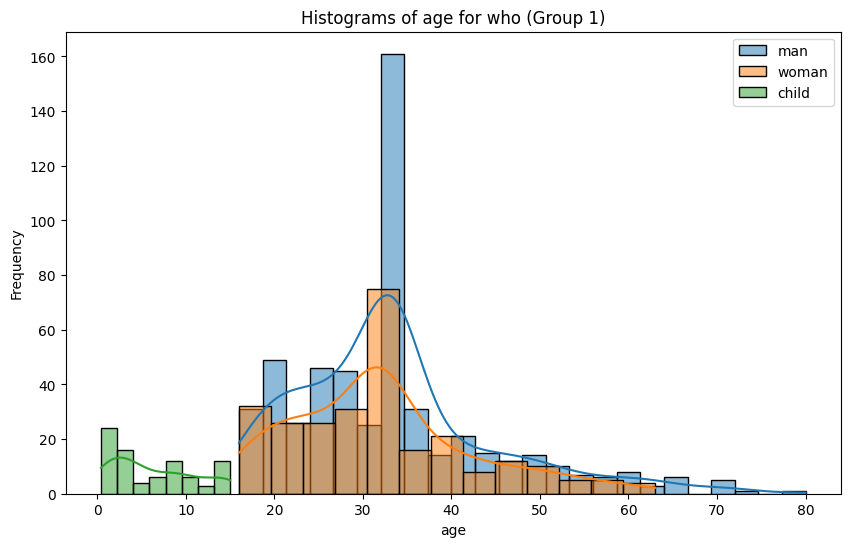

['class', 'who']

In [373]:
plot_features_cat_regression(titanic, "age", with_individual_plot=True)

Con lista de columnas

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


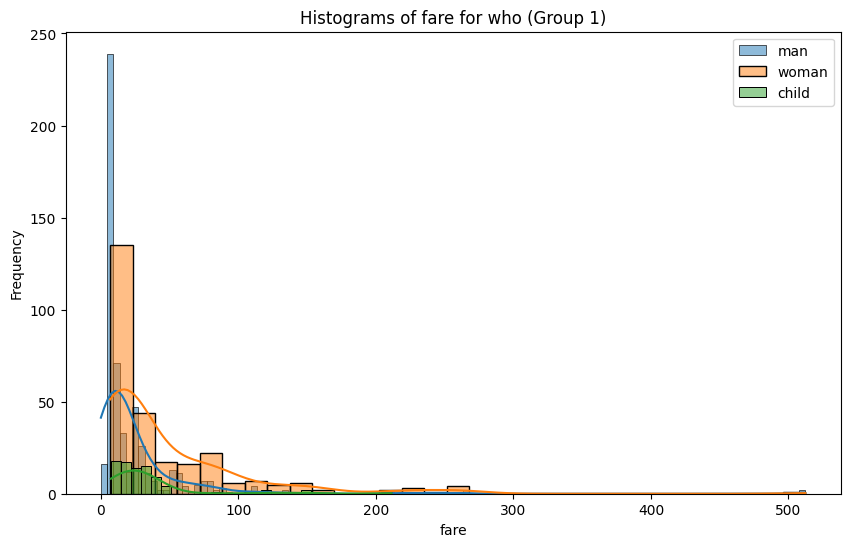

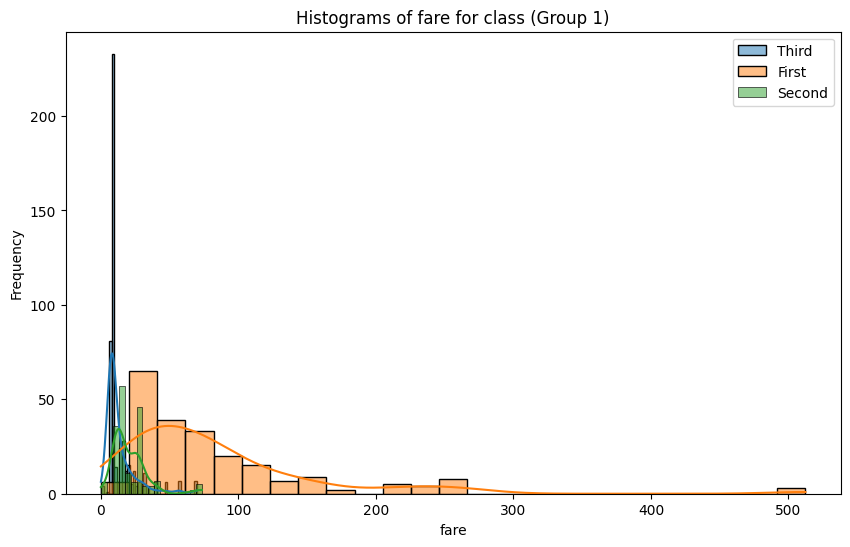

['who', 'class']

In [374]:
plot_features_cat_regression(titanic, "fare", ["who", "class"], with_individual_plot=True)

/Users/Fran/Desktop/ML_Toolbox/Team_Challenge/Toolbox_ML/Toolbox_ML.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


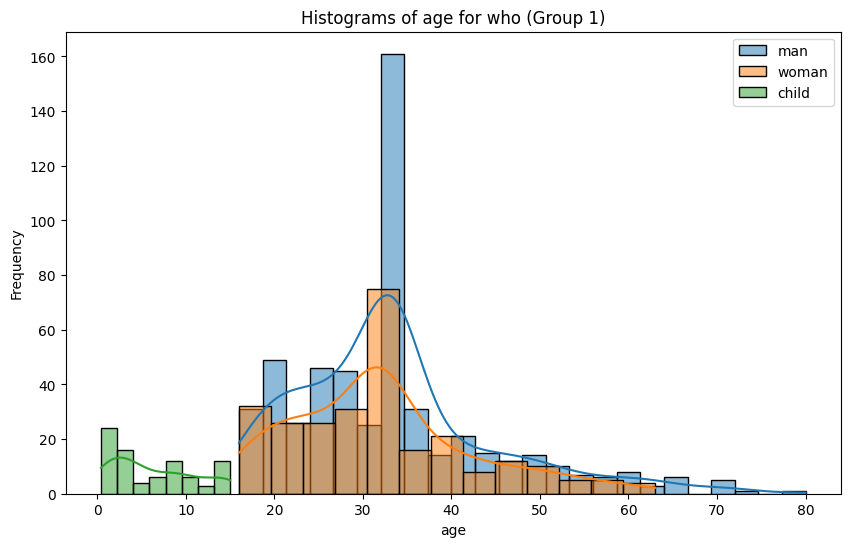

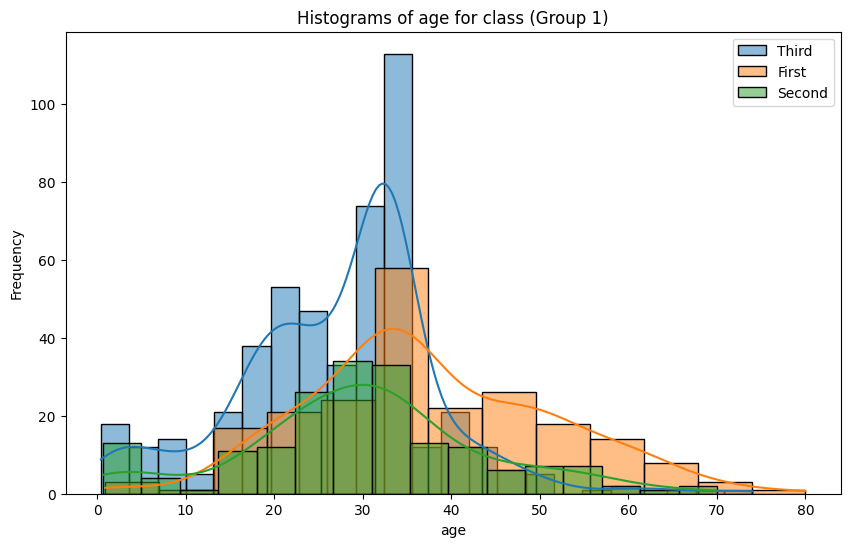

['who', 'class']

In [375]:
plot_features_cat_regression(titanic, "age", ["who", "class", "embark_town"], with_individual_plot=True)

Sin target_col asignada

['age', 'fare']
La variable elegida aleatoriamente para analizar es age


/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_44615/81095024.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_columns[target_col] = df[target_col]


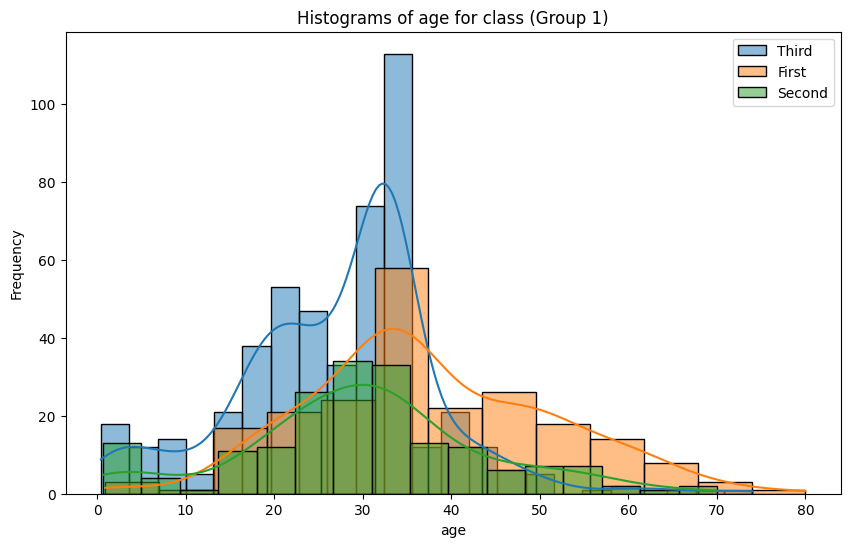

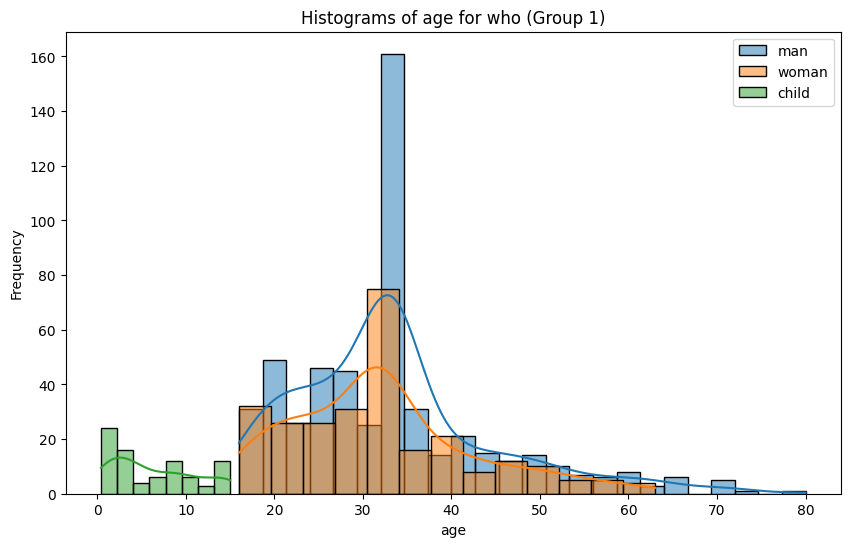

['class', 'who']

In [238]:
plot_features_cat_regression(titanic, with_individual_plot=True)